<h1 style="text-align:center;">AutoEncoders And CNN - MNIST HW Digits</h1>

## Dependencies

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

## Load Data

In [2]:
mnist = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

X_train.shape


(60000, 784)

## AutoEncoders

A deep autoencoders architecture for the MNIST data

In [5]:
input_img = tf.keras.Input(shape=(784,))

encoded = tf.keras.layers.Dense(128,activation="relu")(input_img)
encoded = tf.keras.layers.Dense(64,activation="relu")(encoded)
encoded = tf.keras.layers.Dense(32,activation="relu")(encoded)

In [6]:
decoded = tf.keras.layers.Dense(32,activation="sigmoid")(encoded)
decoded = tf.keras.layers.Dense(64,activation="sigmoid")(encoded)
decoded = tf.keras.layers.Dense(784,activation="sigmoid")(encoded)

In [7]:
autoencoder = tf.keras.Model(input_img,decoded)

In [8]:
autoencoder.compile(
    optimizer="adam",
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"]
)

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 136,688
Trainable params: 136,688
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.0662 - accuracy: 0.0089 - val_loss: 0.0393 - val_accuracy: 0.0061
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0311 - accuracy: 0.0115 - val_loss: 0.0245 - val_accuracy: 0.0111
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0221 - accuracy: 0.0097 - val_loss: 0.0197 - val_accuracy: 0.0103
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0190 - accuracy: 0.0102 - val_loss: 0.0175 - val_accuracy: 0.0121
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0170 - accuracy: 0.0106 - val_loss: 0.0156 - val_accuracy: 0.0107
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0153 - accuracy: 0.0106 - val_loss: 0.0141 - val_accuracy: 0.0106
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0141 - accuracy: 0.0105 - val_loss: 0.0131 - val_accuracy: 0.0114

### Predict the new MNIST images

In [11]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


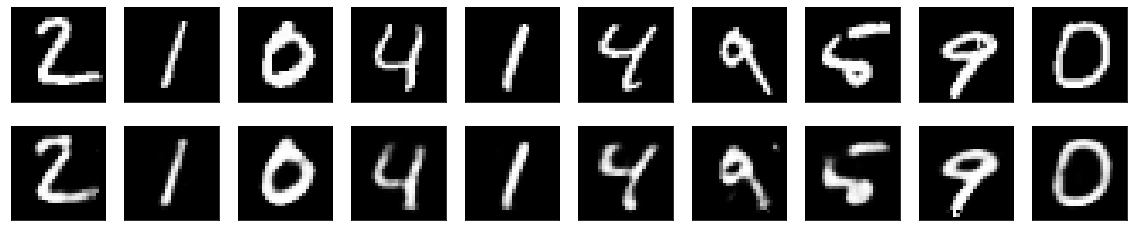

In [12]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n + 1):

    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Image Denoising

#### Using autoencoders with cnn to remove noise ( in this example i'm using the gaussien noise )

In [13]:
(X_train_,_),(X_test_,_) = mnist.load_data()

In [14]:
noise_factor = 0.5

x_train_noisy = X_train_ + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_.shape) 
x_test_noisy = X_test_ + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

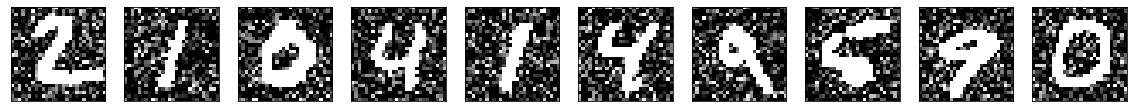

In [15]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Build the deep autoencoders - CNN architecture

In [16]:
input_img = tf.keras.Input(shape=(28,28,1))

x = tf.keras.layers.Conv2D(32,(3,3),activation="relu",padding="same")(input_img)
x = tf.keras.layers.MaxPooling2D((2,2),padding="same")(x)
x = tf.keras.layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)

encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [17]:
autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
autoencoder.fit(x_train_noisy, X_train_,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, X_test_),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 11s 9ms/step - loss: -488.2695 - val_loss: -509.6427
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: -502.9625 - val_loss: -510.6035
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: -503.5666 - val_loss: -510.8856
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: -503.7692 - val_loss: -511.0865
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: -503.9238 - val_loss: -511.2265
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: -504.0203 - val_loss: -511.3019
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: -504.0966 - val_loss: -511.3744
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: -504.1698 - val_loss: -511.3918
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: -504.2306 - val_loss: -511.4061
Epoch 10/100
469/469 [==============

#### Predict the new data ( Densoising )

In [19]:
cnn_decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


#### The autoencoders alongside with cnn removes the noise existed in the previews images

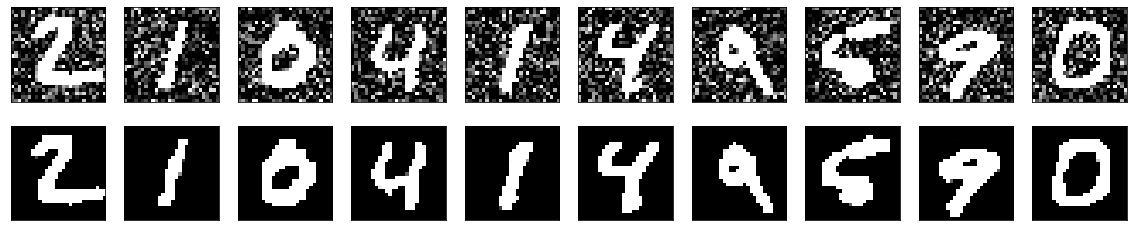

In [20]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n + 1):

    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + n)
    plt.imshow(cnn_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()